In [6]:
pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')
import pandas_profiling

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
data = pd.read_csv('/content/drive/MyDrive/bank-additional-full.csv')
data

age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact month day_of_week  ...  campaign  pdays  previous  \
0      telephone   may         mon  ...         1    999         0   
1      telephone   may         mon  ...         1    999         0   
2      telephone   may         mon  ...         1    999         0   
3      telephone   may         mon  ...         1    999         0   
4      telephone   may         mon  ...         1    999         0   
...          ...   ...         ...  ...       ...    ...       ...   
41183   cellular   nov         fri  ...         1    999         0   
41184   cellular   nov         fri  ...         1    999         0   
41185   cellular   nov         fri  ...         2    999         0   
41186   cellular   nov         fri  ...         1    999         0   
41187   cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
0      nonexistent          1.1          93.994          -36.4      4.857   
1      nonexistent          1.1          93.994          -36.4      4.857   
2      nonexistent          1.1          93.994          -36.4      4.857   
3      nonexistent          1.1          93.994          -36.4      4.857   
4      nonexistent          1.1          93.994          -36.4      4.857   
...            ...          ...             ...            ...        ...   
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
0           5191.0   no  
1           5191.0   no  
2           5191.0   no  
3           5191.0   no  
4           5191.0   no  
...            ...  ...  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[41188 rows x 21 columns]

Although I will be including all the variables in the models, in my opinion, for the target variable of subscribed to term deposit, it seems like the variables of age, education, housing, loan, job, pdays, poutcomes are going to be some of the variables that have significant impact on the target variable.

# Exploratory Data Analysis (EDA)



In [8]:
pandas_profiling.ProfileReport(data)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
# Missing values in the data
print("\nMissing Values in the Data:")
print(data.isnull().sum())


Missing Values in the Data:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [10]:
data['y'] = data['y'].map({'yes': True, 'no': False})

le = LabelEncoder()
data['job'] = le.fit_transform(data['job'])
data['marital'] = le.fit_transform(data['marital'])
data['education'] = le.fit_transform(data['education'])
data['default'] = le.fit_transform(data['default'])
data['housing'] = le.fit_transform(data['housing'])
data['loan'] = le.fit_transform(data['loan'])
data['contact'] = le.fit_transform(data['contact'])
data['month'] = le.fit_transform(data['month'])
data['day_of_week'] = le.fit_transform(data['month'])
data['poutcome'] = le.fit_transform(data['poutcome'])

data.drop('duration', axis=1, inplace=True)
print(data)

       age  job  marital  education  default  housing  loan  contact  month  \
0       56    3        1          0        0        0     0        1      6   
1       57    7        1          3        1        0     0        1      6   
2       37    7        1          3        0        2     0        1      6   
3       40    0        1          1        0        0     0        1      6   
4       56    7        1          3        0        0     2        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
41183   73    5        1          5        0        2     0        0      7   
41184   46    1        1          5        0        0     0        0      7   
41185   56    5        1          6        0        2     0        0      7   
41186   44    9        1          5        0        0     0        0      7   
41187   74    5        1          5        0        2     0        0      7   

       day_of_week  campaign  pdays  previous  pout

#4. Train different scikit-learn binary classification models including logistic regression, decision trees, random forests, support vector classifiers, and any additional methods that you feel are relevant on your prepared data.

# Logistic Regresssion



In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, precision_recall_curve, auc, classification_report

X = data.drop('y', axis=1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_l = LogisticRegression(random_state=42)
model_l.fit(X_train, y_train)

y_pred = model_l.predict(X_test)

accuracy_l = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy on test set: {accuracy_l}")


Logistic Regression Accuracy on test set: 0.8969410050983249


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [12]:
coefs = model_l.coef_[0]
vars = X.columns

coef_df = pd.DataFrame({'Variable': vars, 'Coefficient': coefs})
print(coef_df)

          Variable  Coefficient
0              age     0.003137
1              job    -0.016303
2          marital     0.041661
3        education     0.009798
4          default    -0.051047
5          housing    -0.008228
6             loan     0.000646
7          contact    -0.081073
8            month    -0.043395
9      day_of_week    -0.043395
10        campaign    -0.027604
11           pdays    -0.001648
12        previous    -0.041479
13        poutcome     0.065744
14    emp.var.rate    -0.157611
15  cons.price.idx     0.315530
16   cons.conf.idx     0.029819
17       euribor3m    -0.177554
18     nr.employed    -0.005464


              precision    recall  f1-score   support

       False       0.91      0.99      0.94      7303
        True       0.66      0.19      0.30       935

    accuracy                           0.90      8238
   macro avg       0.78      0.59      0.62      8238
weighted avg       0.88      0.90      0.87      8238



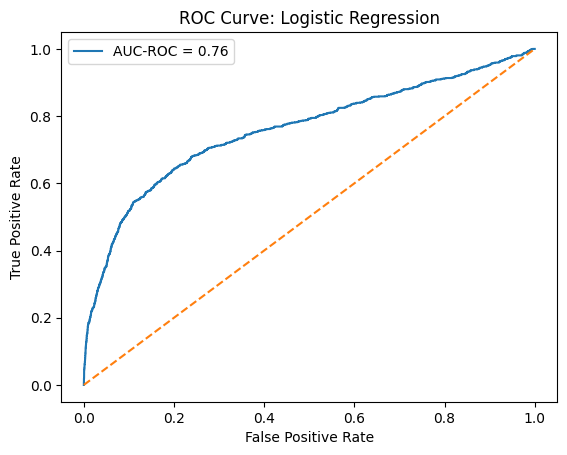

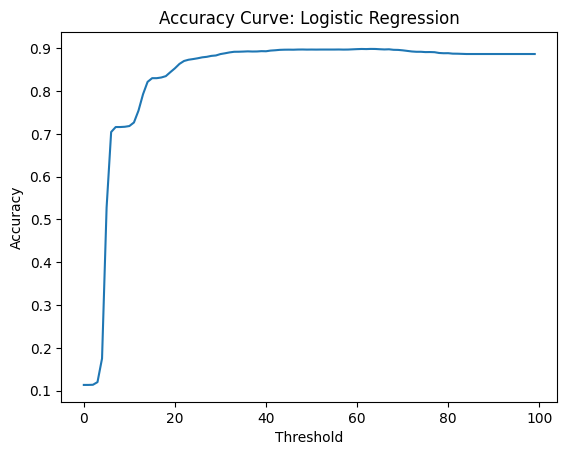

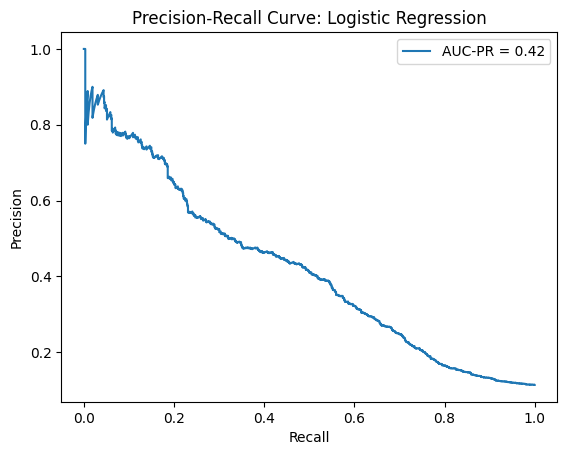

In [13]:
auc_roc_l = roc_auc_score(y_test, model_l.predict_proba(X_test)[:, 1])
precision_l, recall_l, _ = precision_recall_curve(y_test, model_l.predict_proba(X_test)[:, 1])
auc_pr_l = auc(recall_l, precision_l)
report_l = classification_report(y_test, y_pred)

print(report_l)

fpr_l, tpr_l, _ = roc_curve(y_test, model_l.predict_proba(X_test)[:, 1])
plt.plot(fpr_l, tpr_l, label=f'AUC-ROC = {auc_roc_l:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Logistic Regression')
plt.legend()
plt.show()

accuracy_list_l = []
thresholds = list(range(0, 100))
for threshold in thresholds:
    y_pred = (model_l.predict_proba(X_test)[:, 1] >= threshold/100).astype(int)
    accuracy_list_l.append(accuracy_score(y_test, y_pred))
plt.plot(thresholds, accuracy_list_l)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve: Logistic Regression')
plt.show()

plt.plot(recall_l, precision_l, label=f'AUC-PR = {auc_pr_l:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Logistic Regression')
plt.legend()
plt.show()


# Decision Trees

In [14]:
from sklearn.tree import DecisionTreeClassifier

model_d = DecisionTreeClassifier(random_state=42)
model_d.fit(X_train, y_train)

y_pred = model_d.predict(X_test)

accuracy_d = accuracy_score(y_test, y_pred)
report_d = classification_report(y_test, y_pred)

print(f'Decision Tree Accuracy: {accuracy_d:.2f}')
print(report_d)


Decision Tree Accuracy: 0.83
              precision    recall  f1-score   support

       False       0.91      0.90      0.90      7303
        True       0.28      0.32      0.30       935

    accuracy                           0.83      8238
   macro avg       0.60      0.61      0.60      8238
weighted avg       0.84      0.83      0.84      8238



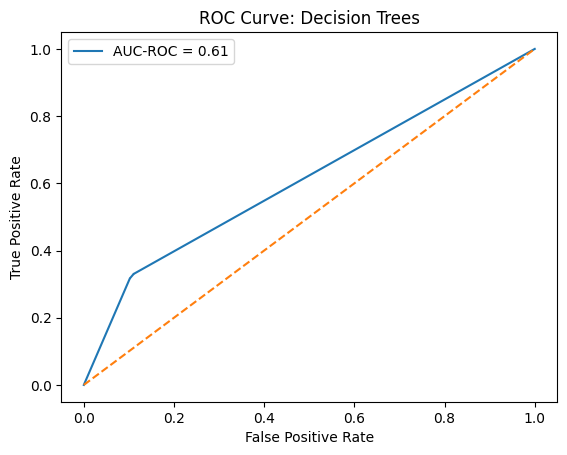

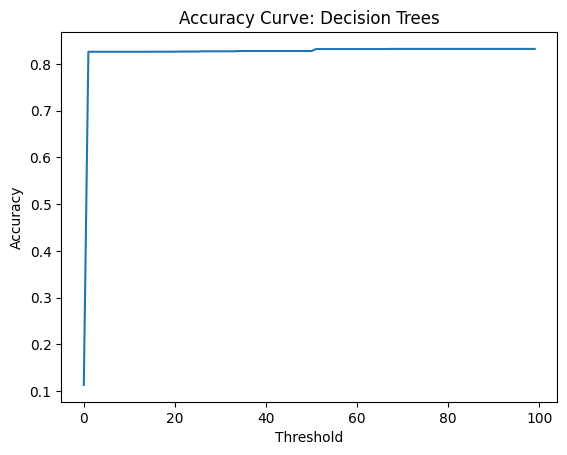

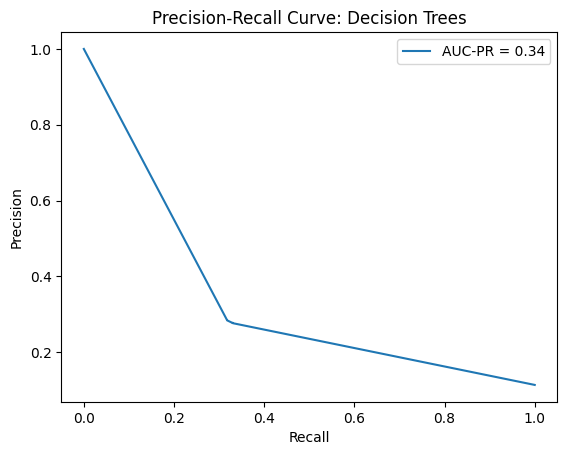

In [15]:
auc_roc_d= roc_auc_score(y_test, model_d.predict_proba(X_test)[:, 1])
precision_d, recall_d, _ = precision_recall_curve(y_test, model_d.predict_proba(X_test)[:, 1])
auc_pr_d = auc(recall_d, precision_d)
report_d = classification_report(y_test, y_pred)


fpr_d, tpr_d, _ = roc_curve(y_test, model_d.predict_proba(X_test)[:, 1])
plt.plot(fpr_d, tpr_d, label=f'AUC-ROC = {auc_roc_d:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Decision Trees')
plt.legend()
plt.show()

accuracy_list_d = []
thresholds = list(range(0, 100))
for threshold in thresholds:
    y_pred = (model_d.predict_proba(X_test)[:, 1] >= threshold/100).astype(int)
    accuracy_list_d.append(accuracy_score(y_test, y_pred))
plt.plot(thresholds, accuracy_list_d)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve: Decision Trees')
plt.show()

plt.plot(recall_d, precision_d, label=f'AUC-PR = {auc_pr_d:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Decision Trees')
plt.legend()
plt.show()


# Random Forest

Random Forest Accuracy: 0.8968196164117505
              precision    recall  f1-score   support

       False       0.91      0.98      0.94      7303
        True       0.62      0.24      0.34       935

    accuracy                           0.90      8238
   macro avg       0.76      0.61      0.64      8238
weighted avg       0.88      0.90      0.88      8238



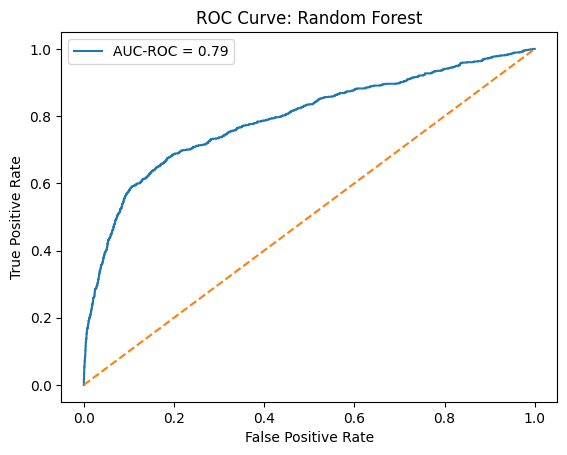

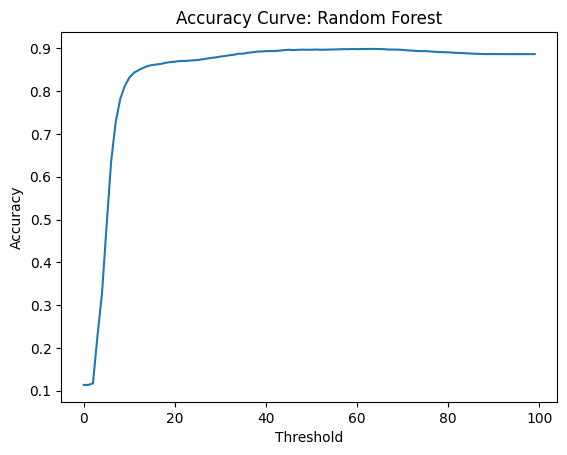

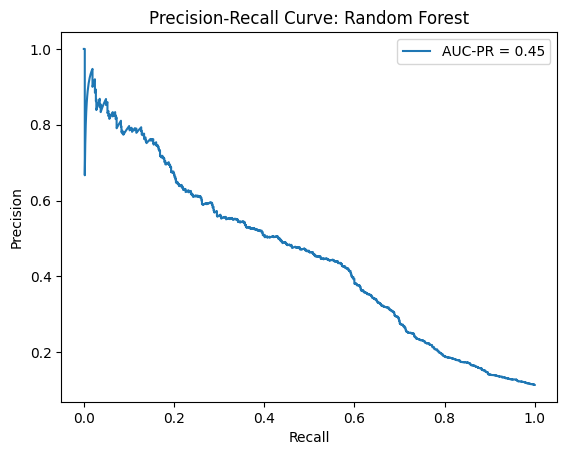

In [17]:
from sklearn.ensemble import RandomForestClassifier


clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy_r = accuracy_score(y_test, y_pred)
print("Random Forest Accuracy:", accuracy_r)

y_score_r = clf.predict_proba(X_test)[:, 1]
fpr_r, tpr_r, thresholds = roc_curve(y_test, y_score_r)
roc_auc_r = auc(fpr_r, tpr_r)
auc_roc_r= roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
precision_r, recall_r, _ = precision_recall_curve(y_test, clf.predict_proba(X_test)[:, 1])
auc_pr_r = auc(recall_r, precision_r)

report_r = classification_report(y_test, y_pred)

print(report_r)

fpr_r, tpr_r, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
plt.plot(fpr_r, tpr_r, label=f'AUC-ROC = {auc_roc_r:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: Random Forest')
plt.legend()
plt.show()

accuracy_list_r = []
thresholds = list(range(0, 100))
for threshold in thresholds:
    y_pred = (clf.predict_proba(X_test)[:, 1] >= threshold/100).astype(int)
    accuracy_list_r.append(accuracy_score(y_test, y_pred))
plt.plot(thresholds, accuracy_list_r)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve: Random Forest')
plt.show()

plt.plot(recall_r, precision_r, label=f'AUC-PR = {auc_pr_r:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: Random Forest')
plt.legend()
plt.show()


# Support Vector Machines

SVM Accuracy: 0.8947560087399854
              precision    recall  f1-score   support

       False       0.91      0.98      0.94      7303
        True       0.61      0.20      0.30       935

    accuracy                           0.89      8238
   macro avg       0.76      0.59      0.62      8238
weighted avg       0.87      0.89      0.87      8238



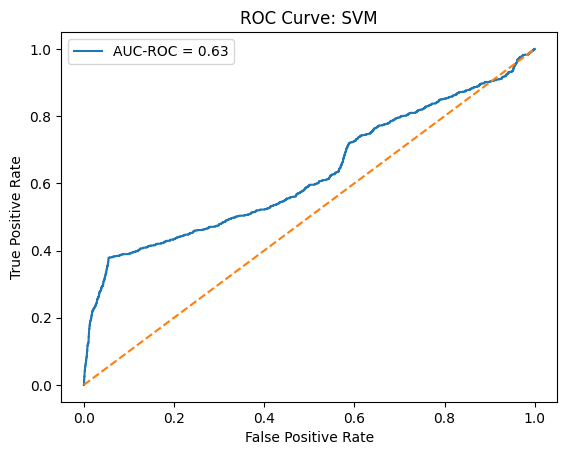

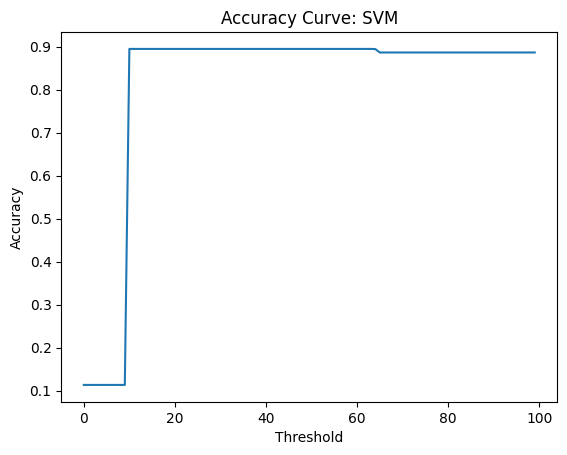

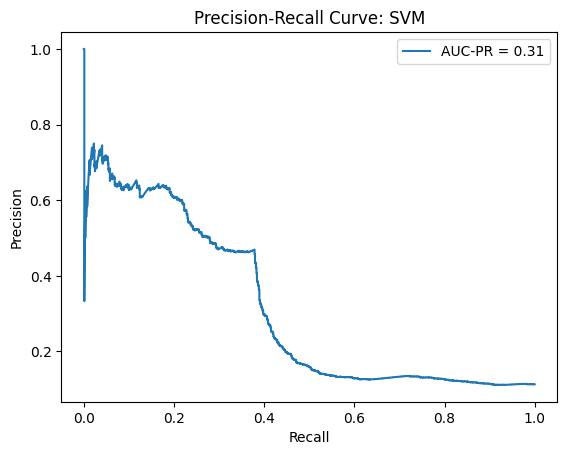

In [18]:
from sklearn.svm import SVC

model_sc = SVC(kernel='rbf', probability=True)

#model_sc = SVC(kernel='linear', probability=True, random_state=42)
model_sc.fit(X_train, y_train)

y_pred = model_sc.predict(X_test)

accuracy_sc = accuracy_score(y_test, y_pred)
print("SVM Accuracy:", accuracy_sc)

fpr_sc, tpr_sc, thresholds = roc_curve(y_test, model_sc.predict_proba(X_test)[:,1])
auc_roc_sc = auc(fpr_sc, tpr_sc)
precision_sc, recall_sc, _ = precision_recall_curve(y_test, model_sc.predict_proba(X_test)[:, 1])
auc_pr_sc = auc(recall_sc, precision_sc)

report_sc = classification_report(y_test, y_pred)
print(report_sc)

plt.plot(fpr_sc, tpr_sc, label=f'AUC-ROC = {auc_roc_sc:.2f}')
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve: SVM')
plt.legend()
plt.show()

accuracy_list_sc = []
thresholds = list(range(0, 100))
for threshold in thresholds:
    y_pred = (model_sc.predict_proba(X_test)[:, 1] >= threshold/100).astype(int)
    accuracy_list_sc.append(accuracy_score(y_test, y_pred))
plt.plot(thresholds, accuracy_list_sc)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy Curve: SVM')
plt.show()

plt.plot(recall_sc, precision_sc, label=f'AUC-PR = {auc_pr_sc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve: SVM')
plt.legend()
plt.show()


6. What conclusions can you draw from the comparison you did in the prior point
about the relative strengths of different classifiers?

Answer: Based on this dataset (excluding "duration" variable), as far as the accuracy is concerned, decision trees seems to be the worst performing classifier with an accuracy of 83% while other classifiers are achieving 89% and above. From ROC point of view, Random Forest gives the best results. Its ROC is more towards the top left corner of the chart telling us that it has higher AUC of 0.79 and hence better performance. Even for precision-recall curve, random forest seems to be the best performing model with AUC of 0.45. While  seems to be the worst performing classifier based on AUC of precision-recall curve.

All the statistics hold true for this dataset as well. By using the new variables, we can increase the accuracy by two percentage points.